In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
#import squarify as sq
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('processedfile.csv')

In [3]:
df.head()

pandas.core.frame.DataFrame

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.isnull().sum()

id                     0
genre                  0
song_name           7008
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
dtype: int64

In [6]:
df = df.fillna("empty")

In [7]:
df.isnull().sum()

id                  0
genre               0
song_name           0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [8]:
df.head()

,id,genre,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539
1,7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427
2,0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821
3,0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661
4,4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298


In [9]:
df.tail()

,id,genre,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
14468,1Eq0j4ZkLiaT5gRyEDLsFl,hardstyle,empty,0.495,0.464,6,-6.849,0,0.0320,0.01800,0.155000,0.0399,0.399,149.948,390000
14469,2XAExGS7uvzh3dqUkqb6dV,hardstyle,empty,0.463,0.973,5,-4.063,0,0.1070,0.00190,0.051600,0.3530,0.123,150.133,214100
14470,0V9C33vJwwWAkjES8Xc3tG,hardstyle,empty,0.531,0.945,9,-1.378,0,0.0400,0.25800,0.000043,0.1580,0.326,155.028,204387
14471,5FyuZX9GZeK8Xv7e8pv5Z9,hardstyle,empty,0.332,0.939,3,-3.294,1,0.0368,0.00147,0.009770,0.1530,0.104,150.358,155541
14472,3XsEfiz0V2Dn3JRLjNqlPK,hardstyle,empty,0.295,0.754,5,-6.962,1,0.0480,0.09820,0.373000,0.0694,0.130,149.700,240451


In [10]:
df = df.sample(
    frac=1,
    random_state=1
).reset_index()

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.loc[df['song_name'] == 'empty','song_name'] = 'song-name'

In [13]:
df

,index,id,genre,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,12970,3TotrQm06es0DKm0Nn5R3d,dnb,song-name,0.726,0.659,4,-5.656,0,0.0782,0.001960,0.85400,0.0663,0.1070,175.026,385360
1,11541,0L6zSejkVzNWpTpfRgxMJK,trap,song-name,0.592,0.977,0,-0.907,1,0.0469,0.015300,0.08400,0.2330,0.4270,145.028,231724
2,4286,1lWK70HfYRFZtWJUwUrY48,Rap,Die Young,0.688,0.642,4,-5.567,0,0.3210,0.221000,0.00000,0.2000,0.3410,160.319,161129
3,13444,31t0WtB4v5vvM20EZ9gLWW,dnb,song-name,0.701,0.797,1,-5.239,0,0.0723,0.000495,0.85000,0.0874,0.0679,174.018,345703
4,14059,1a3Ug0R6JkDQqizk6NAU2L,hardstyle,song-name,0.329,0.743,5,-5.130,0,0.0367,0.000322,0.00409,0.3230,0.1390,150.009,254786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14468,905,5IlnmN5Hs9kvRsbP6pyejP,Dark Trap,Https://murder. Com,0.813,0.653,7,-8.841,1,0.3070,0.228000,0.17700,0.0753,0.6320,150.050,65411
14469,5192,66PlVvBwKgTseZ1vCU3e46,RnB,U Make Me Wanna,0.686,0.818,5,-5.111,0,0.2410,0.037400,0.00000,0.3290,0.6330,166.364,293800
14470,12172,6AwbfviKqXyAgMt50VNDBL,trap,song-name,0.642,0.960,1,0.679,1,0.2500,0.000327,0.00819,0.0526,0.7160,150.002,232000
14471,235,2H5CLUmtvo2VHEeWzMtUqW,Dark Trap,LOST (feat. Kid Cudi),0.908,0.499,6,-7.793,0,0.6420,0.267000,0.00000,0.0780,0.1140,132.968,278760


In [14]:
df = df.sample(
    frac=1,
    random_state=1
).reset_index()

In [15]:
df

,level_0,index,id,genre,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,12970,9620,4QzVAayKMAWYD51gVS4pVp,trance,song-name,0.571,0.820,1,-12.575,1,0.0902,0.000288,0.971000,0.5880,0.7820,133.903,186572
1,11541,12658,619BLOsbc5NbwSqgpa5Wh2,dnb,song-name,0.541,0.950,7,-3.267,1,0.0511,0.000158,0.677000,0.1310,0.3450,173.962,278417
2,4286,10203,2veD2T9UElKuePBt6FW4nO,trance,song-name,0.525,0.675,10,-7.621,1,0.0399,0.006080,0.000175,0.1810,0.1440,127.991,246094
3,13444,5188,3wkNK8tJZ2stygNJm8RCRD,RnB,I Luv Your Girl,0.723,0.322,8,-9.702,1,0.0341,0.014000,0.000000,0.1190,0.0406,180.126,267867
4,14059,11754,7llBnNJt8cCDyWIpRmW7Gs,trap,song-name,0.670,0.943,1,-1.237,1,0.2530,0.021300,0.001630,0.2110,0.3350,140.095,240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14468,905,1966,0UubhGSWqaUfJY0UmYwD4Y,Underground Rap,Swimming Pools (Drank),0.721,0.443,1,-5.853,1,0.2760,0.006010,0.000204,0.0868,0.1760,148.006,247840
14469,5192,1037,6CZpEC9kyyCJWWZKPnviXY,Underground Rap,Pain (feat. OverDoz.),0.653,0.835,7,-5.769,1,0.2920,0.174000,0.000000,0.3060,0.5150,135.041,233267
14470,12172,12678,6FlmNT26IoKirHeIzPKvaJ,dnb,song-name,0.365,0.962,7,-4.559,0,0.0961,0.007730,0.241000,0.1850,0.0510,174.010,287378
14471,235,5518,4GH72Ahs68rDFT6JDzNjht,RnB,Blue Lights,0.808,0.570,0,-7.054,0,0.0823,0.197000,0.000000,0.1080,0.4910,200.064,183398


In [16]:
df = df.sample(
    frac=1,
    random_state=1
)

In [17]:
df

,level_0,index,id,genre,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
12970,9620,5584,5qmXgeIDa1lXB07pgAVlNM,RnB,Stickwitu,0.548,0.554,9,-6.408,1,0.0587,0.283000,0.000000,0.0708,0.3820,159.836,207507
11541,12658,8704,22oouGhnseT4zIJj5tF0Jh,techno,song-name,0.574,0.861,1,-9.790,1,0.0391,0.003740,0.911000,0.1110,0.0746,133.936,330185
4286,10203,990,48zQWrXgc8kkrGkK4ffSJf,Dark Trap,Dn,0.582,0.936,2,-2.544,1,0.0803,0.132000,0.000000,0.1150,0.0791,160.018,194979
13444,5188,951,10Wv7uvDoULWJlKZ6q1nwr,Dark Trap,Dirt & Rubble,0.763,0.552,1,-7.770,1,0.2020,0.222000,0.000066,0.1310,0.4180,149.861,128062
14059,11754,1440,5nRKaef6cLaGeI14OhxS6I,Underground Rap,Apollo!,0.779,0.563,0,-9.488,1,0.3760,0.056400,0.000000,0.1830,0.5040,184.904,155742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1966,5367,0Sc9UwBpChiRKRF8DKvWKZ,RnB,Walk Away (Remember Me) (feat. The DEY),0.672,0.585,0,-5.797,1,0.0582,0.192000,0.000000,0.1560,0.8340,155.996,238160
5192,1037,2558,6lH7efXawM6TwyhepEmMQ4,Trap Metal,Exelsior,0.361,0.794,11,-5.595,0,0.0650,0.025600,0.000000,0.3320,0.2230,155.620,150152
12172,12678,6440,5p7ujcrUXASCNwRaWNHR1C,Pop,Without Me,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.5330,136.041,201661
235,5518,1477,0erWz20ZejKi8WRNoeNQjJ,Underground Rap,Leglock,0.767,0.956,10,-3.833,1,0.2610,0.528000,0.056000,0.2080,0.4270,155.010,123871


In [18]:
df = df.drop(columns=["level_0","index"],axis=1)

In [19]:
df

,id,genre,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
12970,5qmXgeIDa1lXB07pgAVlNM,RnB,Stickwitu,0.548,0.554,9,-6.408,1,0.0587,0.283000,0.000000,0.0708,0.3820,159.836,207507
11541,22oouGhnseT4zIJj5tF0Jh,techno,song-name,0.574,0.861,1,-9.790,1,0.0391,0.003740,0.911000,0.1110,0.0746,133.936,330185
4286,48zQWrXgc8kkrGkK4ffSJf,Dark Trap,Dn,0.582,0.936,2,-2.544,1,0.0803,0.132000,0.000000,0.1150,0.0791,160.018,194979
13444,10Wv7uvDoULWJlKZ6q1nwr,Dark Trap,Dirt & Rubble,0.763,0.552,1,-7.770,1,0.2020,0.222000,0.000066,0.1310,0.4180,149.861,128062
14059,5nRKaef6cLaGeI14OhxS6I,Underground Rap,Apollo!,0.779,0.563,0,-9.488,1,0.3760,0.056400,0.000000,0.1830,0.5040,184.904,155742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0Sc9UwBpChiRKRF8DKvWKZ,RnB,Walk Away (Remember Me) (feat. The DEY),0.672,0.585,0,-5.797,1,0.0582,0.192000,0.000000,0.1560,0.8340,155.996,238160
5192,6lH7efXawM6TwyhepEmMQ4,Trap Metal,Exelsior,0.361,0.794,11,-5.595,0,0.0650,0.025600,0.000000,0.3320,0.2230,155.620,150152
12172,5p7ujcrUXASCNwRaWNHR1C,Pop,Without Me,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.5330,136.041,201661
235,0erWz20ZejKi8WRNoeNQjJ,Underground Rap,Leglock,0.767,0.956,10,-3.833,1,0.2610,0.528000,0.056000,0.2080,0.4270,155.010,123871


In [20]:
df

,id,genre,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
12970,5qmXgeIDa1lXB07pgAVlNM,RnB,Stickwitu,0.548,0.554,9,-6.408,1,0.0587,0.283000,0.000000,0.0708,0.3820,159.836,207507
11541,22oouGhnseT4zIJj5tF0Jh,techno,song-name,0.574,0.861,1,-9.790,1,0.0391,0.003740,0.911000,0.1110,0.0746,133.936,330185
4286,48zQWrXgc8kkrGkK4ffSJf,Dark Trap,Dn,0.582,0.936,2,-2.544,1,0.0803,0.132000,0.000000,0.1150,0.0791,160.018,194979
13444,10Wv7uvDoULWJlKZ6q1nwr,Dark Trap,Dirt & Rubble,0.763,0.552,1,-7.770,1,0.2020,0.222000,0.000066,0.1310,0.4180,149.861,128062
14059,5nRKaef6cLaGeI14OhxS6I,Underground Rap,Apollo!,0.779,0.563,0,-9.488,1,0.3760,0.056400,0.000000,0.1830,0.5040,184.904,155742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0Sc9UwBpChiRKRF8DKvWKZ,RnB,Walk Away (Remember Me) (feat. The DEY),0.672,0.585,0,-5.797,1,0.0582,0.192000,0.000000,0.1560,0.8340,155.996,238160
5192,6lH7efXawM6TwyhepEmMQ4,Trap Metal,Exelsior,0.361,0.794,11,-5.595,0,0.0650,0.025600,0.000000,0.3320,0.2230,155.620,150152
12172,5p7ujcrUXASCNwRaWNHR1C,Pop,Without Me,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.5330,136.041,201661
235,0erWz20ZejKi8WRNoeNQjJ,Underground Rap,Leglock,0.767,0.956,10,-3.833,1,0.2610,0.528000,0.056000,0.2080,0.4270,155.010,123871


In [21]:
df['id']

12970    5qmXgeIDa1lXB07pgAVlNM
11541    22oouGhnseT4zIJj5tF0Jh
4286     48zQWrXgc8kkrGkK4ffSJf
13444    10Wv7uvDoULWJlKZ6q1nwr
14059    5nRKaef6cLaGeI14OhxS6I
                  ...          
905      0Sc9UwBpChiRKRF8DKvWKZ
5192     6lH7efXawM6TwyhepEmMQ4
12172    5p7ujcrUXASCNwRaWNHR1C
235      0erWz20ZejKi8WRNoeNQjJ
13349    6jTLdoH9ASUcZ25NYeaWQu
Name: id, Length: 14473, dtype: object

In [22]:
for i in range(len(df['id'])):
    if(df['song_name'][i] == "song-name"):
        df['song_name'][i] = "spotify:track:" + df['id'][i]
df

,id,genre,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
12970,5qmXgeIDa1lXB07pgAVlNM,RnB,Stickwitu,0.548,0.554,9,-6.408,1,0.0587,0.283000,0.000000,0.0708,0.3820,159.836,207507
11541,22oouGhnseT4zIJj5tF0Jh,techno,spotify:track:22oouGhnseT4zIJj5tF0Jh,0.574,0.861,1,-9.790,1,0.0391,0.003740,0.911000,0.1110,0.0746,133.936,330185
4286,48zQWrXgc8kkrGkK4ffSJf,Dark Trap,Dn,0.582,0.936,2,-2.544,1,0.0803,0.132000,0.000000,0.1150,0.0791,160.018,194979
13444,10Wv7uvDoULWJlKZ6q1nwr,Dark Trap,Dirt & Rubble,0.763,0.552,1,-7.770,1,0.2020,0.222000,0.000066,0.1310,0.4180,149.861,128062
14059,5nRKaef6cLaGeI14OhxS6I,Underground Rap,Apollo!,0.779,0.563,0,-9.488,1,0.3760,0.056400,0.000000,0.1830,0.5040,184.904,155742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0Sc9UwBpChiRKRF8DKvWKZ,RnB,Walk Away (Remember Me) (feat. The DEY),0.672,0.585,0,-5.797,1,0.0582,0.192000,0.000000,0.1560,0.8340,155.996,238160
5192,6lH7efXawM6TwyhepEmMQ4,Trap Metal,Exelsior,0.361,0.794,11,-5.595,0,0.0650,0.025600,0.000000,0.3320,0.2230,155.620,150152
12172,5p7ujcrUXASCNwRaWNHR1C,Pop,Without Me,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.5330,136.041,201661
235,0erWz20ZejKi8WRNoeNQjJ,Underground Rap,Leglock,0.767,0.956,10,-3.833,1,0.2610,0.528000,0.056000,0.2080,0.4270,155.010,123871


In [23]:
#Calculating the number of songs of each genre
print(type(df['genre']))
popular_genre=df.groupby('genre').size().unique
print(popular_genre)
genre_list=df['genre'].values.tolist()
pd.set_option('precision', 3)

<class 'pandas.core.series.Series'>
<bound method Series.unique of genre
Dark Trap           999
Emo                1001
Hiphop             1001
Pop                 461
Rap                1001
RnB                1001
Trap Metal         1001
Underground Rap    1001
dnb                1001
hardstyle          1001
psytrance          1001
techhouse          1001
techno             1001
trance             1001
trap               1001
dtype: int64>


In [24]:
df

,id,genre,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
12970,5qmXgeIDa1lXB07pgAVlNM,RnB,Stickwitu,0.548,0.554,9,-6.408,1,0.059,2.830e-01,0.000e+00,0.071,0.382,159.836,207507
11541,22oouGhnseT4zIJj5tF0Jh,techno,spotify:track:22oouGhnseT4zIJj5tF0Jh,0.574,0.861,1,-9.790,1,0.039,3.740e-03,9.110e-01,0.111,0.075,133.936,330185
4286,48zQWrXgc8kkrGkK4ffSJf,Dark Trap,Dn,0.582,0.936,2,-2.544,1,0.080,1.320e-01,0.000e+00,0.115,0.079,160.018,194979
13444,10Wv7uvDoULWJlKZ6q1nwr,Dark Trap,Dirt & Rubble,0.763,0.552,1,-7.770,1,0.202,2.220e-01,6.630e-05,0.131,0.418,149.861,128062
14059,5nRKaef6cLaGeI14OhxS6I,Underground Rap,Apollo!,0.779,0.563,0,-9.488,1,0.376,5.640e-02,0.000e+00,0.183,0.504,184.904,155742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0Sc9UwBpChiRKRF8DKvWKZ,RnB,Walk Away (Remember Me) (feat. The DEY),0.672,0.585,0,-5.797,1,0.058,1.920e-01,0.000e+00,0.156,0.834,155.996,238160
5192,6lH7efXawM6TwyhepEmMQ4,Trap Metal,Exelsior,0.361,0.794,11,-5.595,0,0.065,2.560e-02,0.000e+00,0.332,0.223,155.620,150152
12172,5p7ujcrUXASCNwRaWNHR1C,Pop,Without Me,0.752,0.488,6,-7.050,1,0.070,2.970e-01,9.110e-06,0.094,0.533,136.041,201661
235,0erWz20ZejKi8WRNoeNQjJ,Underground Rap,Leglock,0.767,0.956,10,-3.833,1,0.261,5.280e-01,5.600e-02,0.208,0.427,155.010,123871


In [25]:
pd.set_option('display.width', 100)

In [26]:
correlation=df.corr(method='spearman')
print(correlation)

                  danceability  energy    key  loudness   mode  speechiness  acousticness  \
danceability             1.000  -0.392 -0.011    -0.306  0.055        0.238         0.223   
energy                  -0.392   1.000  0.050     0.544 -0.039       -0.093        -0.535   
key                     -0.011   0.050  1.000     0.006 -0.231       -0.015        -0.019   
loudness                -0.306   0.544  0.006     1.000 -0.015        0.051        -0.155   
mode                     0.055  -0.039 -0.231    -0.015  1.000        0.016        -0.024   
speechiness              0.238  -0.093 -0.015     0.051  0.016        1.000         0.265   
acousticness             0.223  -0.535 -0.019    -0.155 -0.024        0.265         1.000   
instrumentalness        -0.083   0.418  0.064    -0.129 -0.038       -0.355        -0.524   
liveness                -0.261   0.216 -0.005     0.182 -0.009        0.062        -0.080   
valence                  0.321  -0.079  0.027     0.065  0.014        

<AxesSubplot:title={'center':'Correlation heatmap'}>

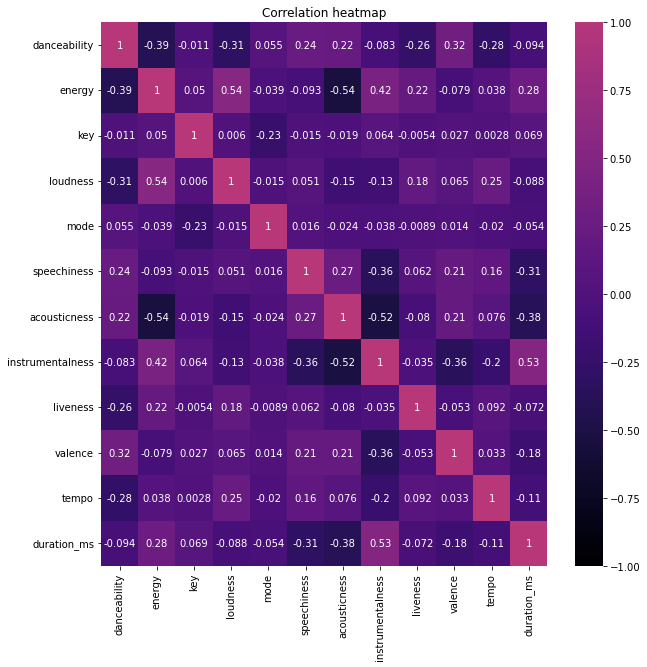

In [27]:
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="magma",center=1)


<AxesSubplot:xlabel='energy', ylabel='loudness'>

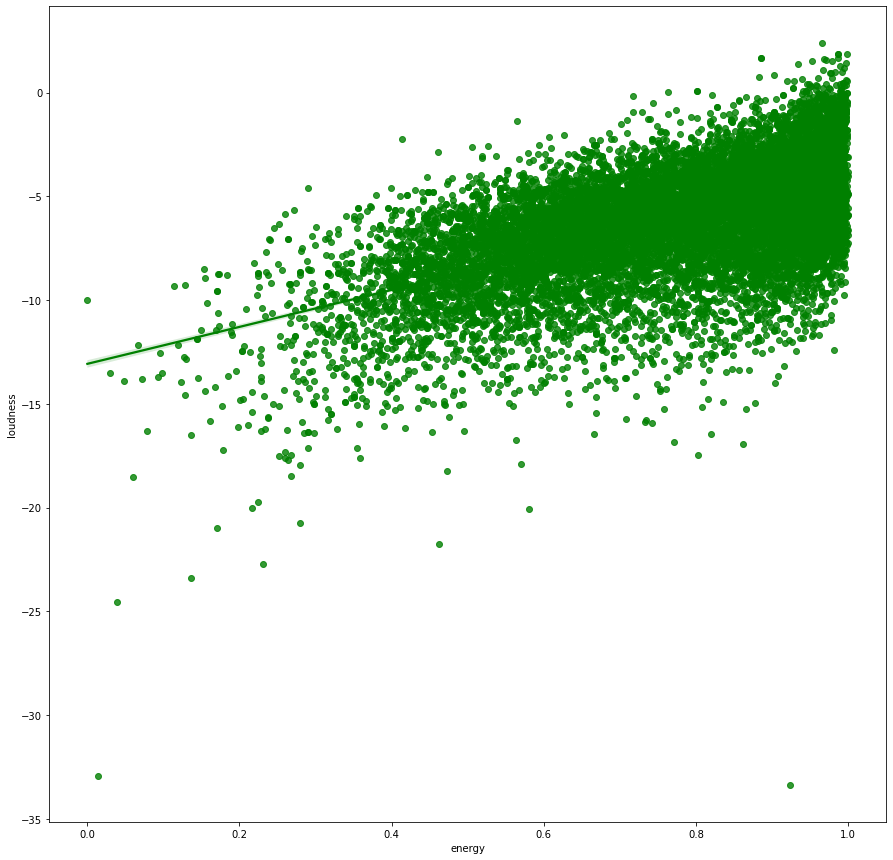

In [30]:
# Analysing the relationship between energy and loudness
fig=plt.subplots(figsize=(15,15))
sns.regplot(x='energy',y='loudness',data=df,color='green')

In [41]:
x = np.array(df['tempo'])
y = np.array(df['valence'])
y

array([0.382 , 0.0746, 0.0791, ..., 0.533 , 0.427 , 0.0604])

In [47]:
newx = []
for i in range(1000):
    #print(x[i])
    newx.append(x[i])
newy = []
for i in range(1000):
    newy.append(y[i])

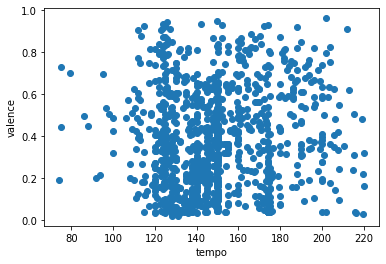

In [49]:
plt.xlabel("tempo")
plt.ylabel("valence")
plt.scatter(newx,newy)
plt.show()

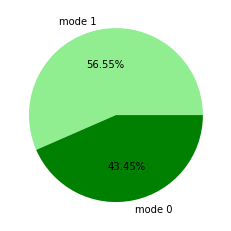

In [52]:
#mode 
x=df.loc[df["mode"]==1].count()[0]
y=df.loc[df["mode"]==0].count()[0]
c = ["lightgreen","green"] 
lb = ["mode 1","mode 0"]
plt.pie([x,y],labels=lb,autopct="%1.2f%%",colors=c)
plt.show()

In [129]:
#danceability and instrumentalness tempo energy
x = df.loc[:,['energy','instrumentalness','tempo']].values
y=df.loc[:,'danceability'].values

In [130]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [131]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [138]:
regressor.score(X_test,y_test)

0.17031582515005206

In [63]:
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

      Actual  Predicted
0      0.360      0.633
1      0.384      0.667
2      0.661      0.651
3      0.503      0.577
4      0.809      0.598
...      ...        ...
4337   0.716      0.717
4338   0.483      0.703
4339   0.426      0.549
4340   0.815      0.756
4341   0.925      0.706

[4342 rows x 2 columns]


In [64]:
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11293049126099632
Mean Squared Error: 0.019909100193939322
Root Mean Squared Error: 0.14109961089223216


Text(0, 0.5, 'Test values')

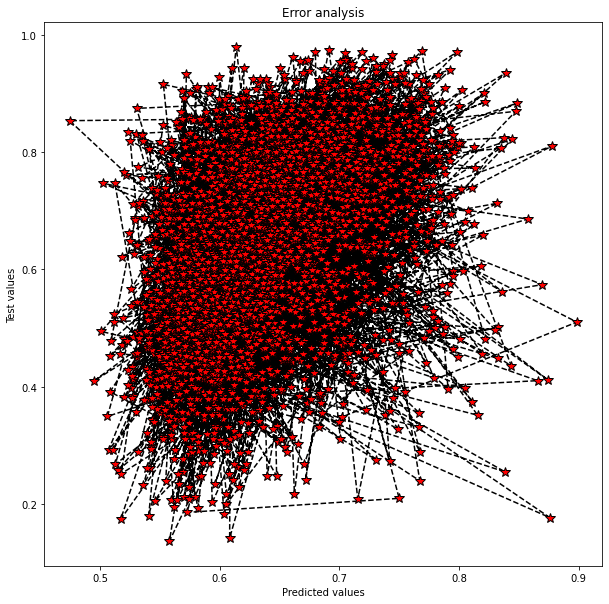

In [78]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error analysis')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

In [123]:
x=df.loc[:,['danceability','tempo','valence','energy','loudness']].values
y=df.loc[:,'genre'].values

In [124]:
Encoder_y=LabelEncoder()
Y = Encoder_y.fit_transform(y)
Y=pd.DataFrame(Y)
Y

,0
0,5
1,12
2,0
3,0
4,7
...,...
14468,5
14469,6
14470,3
14471,7


In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [126]:
# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors = 118)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array(['Dark Trap', 'Hiphop', 'Dark Trap', ..., 'Emo', 'Emo', 'Emo'],
      dtype=object)

In [127]:
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

               Actual  Predicted
0          Trap Metal  Dark Trap
1     Underground Rap     Hiphop
2          Trap Metal  Dark Trap
3                 Rap        Rap
4     Underground Rap        Rap
...               ...        ...
4337              Rap        Rap
4338              Emo        Emo
4339              Emo        Emo
4340              Emo        Emo
4341              Emo        Emo

[4342 rows x 2 columns]
